# Pandas 基础
* 使用DataFrame 类
* 基础分析
* Series类
* GroupBy操作

In [1]:
import numpy as np
import pandas as pd

In [4]:
df = pd.DataFrame([10,20,30,40],
    columns = ['number'], index = ['a', 'b', 'c', 'd']
)
df

,number
a,10
b,20
c,30
d,40


In [5]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [6]:
df.columns

Index(['number'], dtype='object')

In [7]:
df.ix['c']

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


number    30
Name: c, dtype: int64

In [8]:
# 多个数据
df.ix[['a', 'b']]

,number
a,10
b,20


In [9]:
# 切片
df.ix[df.index[1:3]]

,number
b,20
c,30


In [10]:
df.sum()

number    100
dtype: int64

In [11]:
# 应用函数
df.apply(lambda x: x**2)

,number
a,100
b,400
c,900
d,1600


In [12]:
# 增加一列(元组)
df['floats'] = (1.5, 2.5, 3.5, 4.5)

In [13]:
df

,number,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [14]:
# 显示某一列
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [15]:
# 指定索引增加列
df['name'] =  pd.DataFrame(['Yves', 'Guido', 'Fexix', 'Frances'],
                          index=['d', 'a', 'b', 'c'])

In [16]:
df

,number,floats,name
a,10,1.5,Guido
b,20,2.5,Fexix
c,30,3.5,Frances
d,40,4.5,Yves


In [17]:
# 追加
df.append(
    {
        "number":100,
        "floats": 5.75,
        "name": 'Henry'
    }, ignore_index = True  # 忽略索引，会自动生成索引
)

,number,floats,name
0,10,1.50,Guido
1,20,2.50,Fexix
2,30,3.50,Frances
3,40,4.50,Yves
4,100,5.75,Henry


In [18]:
# 增加一列
df = df.join(pd.DataFrame([1,4,9,16,25], 
    index = ['a','b','c','d', 'y'],
    columns=['squares',]))

In [19]:
# 计算列的平均值
df[['number', 'squares']].mean()

number     25.0
squares     7.5
dtype: float64

In [20]:
# 生成9行4列的随机数
a = np.random.standard_normal((9,4))
a.round(6)
a

array([[-0.39581548,  0.97846656, -1.81251802, -1.81465527],
       [-0.11067188,  1.99943491, -0.26763135,  0.61831172],
       [ 2.02788551, -1.29798459, -0.81439194,  3.02260675],
       [-0.70169143, -1.4045281 , -0.53253563,  1.41198485],
       [ 0.36148651, -1.8883438 ,  1.14358189,  0.75988078],
       [ 1.19127656,  0.19304192,  0.13182943, -0.10724572],
       [ 0.27151585, -0.16696404, -0.60820646,  0.76354324],
       [ 0.96785487,  1.42340306,  0.82081129, -0.77082344],
       [-0.19949841, -0.34408503, -1.02948451,  0.32951347]])

In [21]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-0.395815,0.978467,-1.812518,-1.814655
1,-0.110672,1.999435,-0.267631,0.618312
2,2.027886,-1.297985,-0.814392,3.022607
3,-0.701691,-1.404528,-0.532536,1.411985
4,0.361487,-1.888344,1.143582,0.759881
5,1.191277,0.193042,0.131829,-0.107246
6,0.271516,-0.166964,-0.608206,0.763543
7,0.967855,1.423403,0.820811,-0.770823
8,-0.199498,-0.344085,-1.029485,0.329513


In [22]:
df.columns = [['a', 'b', 'c', 'd']]
df

,a,b,c,d
0,-0.395815,0.978467,-1.812518,-1.814655
1,-0.110672,1.999435,-0.267631,0.618312
2,2.027886,-1.297985,-0.814392,3.022607
3,-0.701691,-1.404528,-0.532536,1.411985
4,0.361487,-1.888344,1.143582,0.759881
5,1.191277,0.193042,0.131829,-0.107246
6,0.271516,-0.166964,-0.608206,0.763543
7,0.967855,1.423403,0.820811,-0.770823
8,-0.199498,-0.344085,-1.029485,0.329513


In [23]:
df['b'][3]

-1.4045281049035625

In [24]:
# 获取时间序列
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

In [25]:
# 修改索引
df.index =dates
df

,a,b,c,d
2015-01-31,-0.395815,0.978467,-1.812518,-1.814655
2015-02-28,-0.110672,1.999435,-0.267631,0.618312
2015-03-31,2.027886,-1.297985,-0.814392,3.022607
2015-04-30,-0.701691,-1.404528,-0.532536,1.411985
2015-05-31,0.361487,-1.888344,1.143582,0.759881
2015-06-30,1.191277,0.193042,0.131829,-0.107246
2015-07-31,0.271516,-0.166964,-0.608206,0.763543
2015-08-31,0.967855,1.423403,0.820811,-0.770823
2015-09-30,-0.199498,-0.344085,-1.029485,0.329513


In [26]:
# 案列求和
df.sum()
# 平均数
df.mean()
# 累加
df.cumsum
# 描述统计信息，按列进行
df.describe()

,a,b,c,d
count,9.000000,9.000000,9.000000,9.000000
mean,0.379149,-0.056395,-0.329838,0.468124
std,0.871772,1.339750,0.918775,1.355892
min,-0.701691,-1.888344,-1.812518,-1.814655
25%,-0.199498,-1.297985,-0.814392,-0.107246
50%,0.271516,-0.166964,-0.532536,0.618312
75%,0.967855,0.978467,0.131829,0.763543
max,2.027886,1.999435,1.143582,3.022607


In [27]:
np.sqrt(df)

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,a,b,c,d
2015-01-31,NaN,0.989175,NaN,NaN
2015-02-28,NaN,1.414014,NaN,0.786328
2015-03-31,1.424038,NaN,NaN,1.738565
2015-04-30,NaN,NaN,NaN,1.188270
2015-05-31,0.601237,NaN,1.069384,0.871711
2015-06-30,1.091456,0.439365,0.363083,NaN
2015-07-31,0.521072,NaN,NaN,0.873810
2015-08-31,0.983796,1.193065,0.905986,NaN
2015-09-30,NaN,NaN,NaN,0.574033


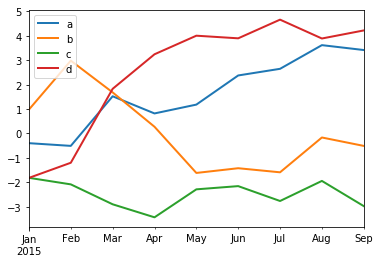

In [28]:
# 作图
%matplotlib inline
df.cumsum().plot(lw=2.0)

## Series类

In [29]:
type(df['a'])

pandas.core.series.Series

Text(0, 0.5, 'value')

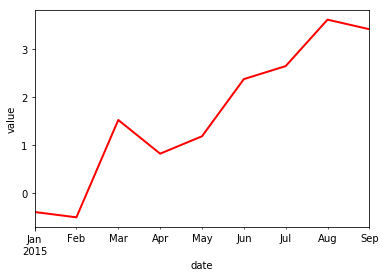

In [30]:
import matplotlib.pyplot as plt
df['a'].cumsum().plot(style='r', lw=2)
plt.xlabel('date')
plt.ylabel('value')

In [31]:
# 分组功能
df['Quarter'] = ['Q1', 'Q1','Q1','Q2', 'Q2','Q2','Q3', 'Q3','Q3']
df

,a,b,c,d,Quarter
2015-01-31,-0.395815,0.978467,-1.812518,-1.814655,Q1
2015-02-28,-0.110672,1.999435,-0.267631,0.618312,Q1
2015-03-31,2.027886,-1.297985,-0.814392,3.022607,Q1
2015-04-30,-0.701691,-1.404528,-0.532536,1.411985,Q2
2015-05-31,0.361487,-1.888344,1.143582,0.759881,Q2
2015-06-30,1.191277,0.193042,0.131829,-0.107246,Q2
2015-07-31,0.271516,-0.166964,-0.608206,0.763543,Q3
2015-08-31,0.967855,1.423403,0.820811,-0.770823,Q3
2015-09-30,-0.199498,-0.344085,-1.029485,0.329513,Q3


In [32]:
groups = df.groupby('Quarter')
groups

In [33]:
groups.mean()

,a,b,c,d
Quarter,,,,
Q1,0.507133,0.559972,-0.964847,0.608754
Q2,0.283691,-1.033277,0.247625,0.688207
Q3,0.346624,0.304118,-0.272293,0.107411


In [34]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [35]:
df['Odd_Even'] = ['Odd','Even','Odd','Even','Odd','Even','Odd','Even','Odd']
df

,a,b,c,d,Quarter,Odd_Even
2015-01-31,-0.395815,0.978467,-1.812518,-1.814655,Q1,Odd
2015-02-28,-0.110672,1.999435,-0.267631,0.618312,Q1,Even
2015-03-31,2.027886,-1.297985,-0.814392,3.022607,Q1,Odd
2015-04-30,-0.701691,-1.404528,-0.532536,1.411985,Q2,Even
2015-05-31,0.361487,-1.888344,1.143582,0.759881,Q2,Odd
2015-06-30,1.191277,0.193042,0.131829,-0.107246,Q2,Even
2015-07-31,0.271516,-0.166964,-0.608206,0.763543,Q3,Odd
2015-08-31,0.967855,1.423403,0.820811,-0.770823,Q3,Even
2015-09-30,-0.199498,-0.344085,-1.029485,0.329513,Q3,Odd


In [36]:
# 多维度分组
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [37]:
# 取平均数
groups.mean()

a         b         c         d
Quarter Odd_Even                                        
Q1      Even     -0.110672  1.999435 -0.267631  0.618312
        Odd       0.816035 -0.159759 -1.313455  0.603976
Q2      Even      0.244793 -0.605743 -0.200353  0.652370
        Odd       0.361487 -1.888344  1.143582  0.759881
Q3      Even      0.967855  1.423403  0.820811 -0.770823
        Odd       0.036009 -0.255525 -0.818845  0.546528

## 金融数据分析

In [38]:
#import pandas.io.data as web
#from pandas.io import data, wb
#from pandas_datareader import data, wb
import pandas_datareader.data as web

In [39]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo', 
              start='2000-1-1', end='2014-9-26')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3748 entries, 2000-01-03 to 2014-09-26
Data columns (total 6 columns):
High         3748 non-null float64
Low          3748 non-null float64
Open         3748 non-null float64
Close        3748 non-null float64
Volume       3748 non-null float64
Adj Close    3748 non-null float64
dtypes: float64(6)
memory usage: 205.0 KB


In [40]:
# 打印最后五条数据
DAX.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-22,9812.769531,9735.690430,9748.530273,9749.540039,73981000.0,9749.540039
2014-09-23,9719.660156,9589.030273,9713.400391,9595.030273,88196000.0,9595.030273
2014-09-24,9669.450195,9534.769531,9598.769531,9661.969727,85850600.0,9661.969727
2014-09-25,9718.110352,9482.540039,9644.360352,9510.009766,97697000.0,9510.009766
2014-09-26,9545.339844,9454.879883,9500.549805,9490.549805,83499600.0,9490.549805


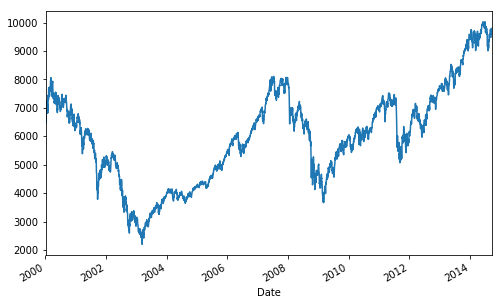

In [41]:
DAX['Close'].plot(figsize=(8,5))

In [42]:
%%time
import numpy as np
DAX['Ret_Loop'] = 0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] / DAX['Close'][i-1])

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


CPU times: user 1min 31s, sys: 217 ms, total: 1min 31s
Wall time: 1min 31s


In [43]:
DAX[['Close','Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2014-09-22,9749.540039,0
2014-09-23,9595.030273,0
2014-09-24,9661.969727,0
2014-09-25,9510.009766,0
2014-09-26,9490.549805,0


In [44]:
%time
DAX['Return'] = np.log(DAX['Close']/DAX['Close'].shift(1))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs


In [45]:
DAX[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2014-09-22,9749.540039,0,-0.005087
2014-09-23,9595.030273,0,-0.015975
2014-09-24,9661.969727,0,0.006952
2014-09-25,9510.009766,0,-0.015853
2014-09-26,9490.549805,0,-0.002048


array([<matplotlib.axes._subplots.AxesSubplot object at 0x116243780>,
      dtype=object)

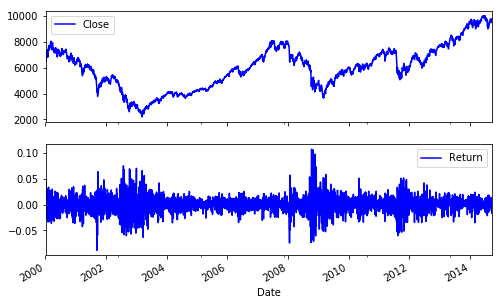

In [46]:
DAX[['Close','Return']].plot(subplots=True,
                            style='b', figsize=(8,5))

In [47]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)
DAX.tail()

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=42,center=False).mean()
  """Entry point for launching an IPython kernel.
/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).mean()
  


,High,Low,Open,Close,Volume,Adj Close,Ret_Loop,Return,42d,252d
Date,,,,,,,,,,
2014-09-22,9812.769531,9735.690430,9748.530273,9749.540039,73981000.0,9749.540039,0,-0.005087,9464.947103,9429.624814
2014-09-23,9719.660156,9589.030273,9713.400391,9595.030273,88196000.0,9595.030273,0,-0.015975,9463.780924,9433.433307
2014-09-24,9669.450195,9534.769531,9598.769531,9661.969727,85850600.0,9661.969727,0,0.006952,9465.299967,9437.391125
2014-09-25,9718.110352,9482.540039,9644.360352,9510.009766,97697000.0,9510.009766,0,-0.015853,9461.880441,9440.741839
2014-09-26,9545.339844,9454.879883,9500.549805,9490.549805,83499600.0,9490.549805,0,-0.002048,9459.424967,9444.021403


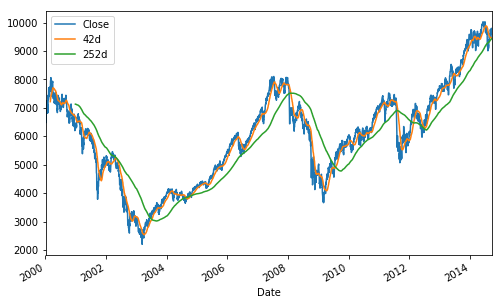

In [48]:
DAX[['Close', '42d','252d']].plot(figsize=(8,5))

In [49]:
import math
# 对数收益率的移动历史标准差-移动历史波动率

In [52]:
DAX['MOV_vol'] = pd.rolling_std(DAX['Return'], window=252)*math.sqrt(252)

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  """Entry point for launching an IPython kernel.


In [53]:
 DAX.tail()

,High,Low,Open,Close,Volume,Adj Close,Ret_Loop,Return,42d,252d,MOV_vol
Date,,,,,,,,,,,
2014-09-22,9812.769531,9735.690430,9748.530273,9749.540039,73981000.0,9749.540039,0,-0.005087,9464.947103,9429.624814,0.138284
2014-09-23,9719.660156,9589.030273,9713.400391,9595.030273,88196000.0,9595.030273,0,-0.015975,9463.780924,9433.433307,0.139165
2014-09-24,9669.450195,9534.769531,9598.769531,9661.969727,85850600.0,9661.969727,0,0.006952,9465.299967,9437.391125,0.139287
2014-09-25,9718.110352,9482.540039,9644.360352,9510.009766,97697000.0,9510.009766,0,-0.015853,9461.880441,9440.741839,0.140235
2014-09-26,9545.339844,9454.879883,9500.549805,9490.549805,83499600.0,9490.549805,0,-0.002048,9459.424967,9444.021403,0.140255


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115fda898>,
      dtype=object)

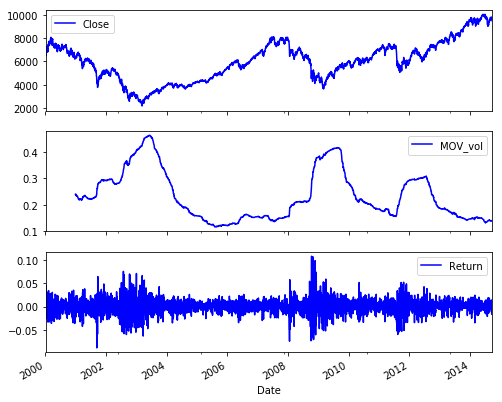

In [55]:
DAX[['Close','MOV_vol', 'Return']].plot(subplots=True, style='b'
                                       ,figsize=(8,7))

## 回归分析

In [5]:
import pandas as pd
# from urllib import urlretrieve
from urllib.request import urlretrieve

In [58]:
es_url = 'http://www.stoxx.com/download/historical_vlaues/hbrbcpe.txt'

In [6]:
# d = pd.read_excel(excel_path, sheetname=None)
d = pd.read_excel('./source/vstoxx_march_2014.xlsx') 

ModuleNotFoundError: No module named 'xlrd'

# 高频数据

In [7]:
import numpy as np
import pandas as pd
import datetime as dt
%matplotlib inline

In [9]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [10]:
year = '2017'
month = '07'
days = ['03', '04', '05', '06', '07']

In [11]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [12]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
bid        0 non-null object
bdepth     0 non-null object
bdeptht    0 non-null object
offer      0 non-null object
odepth     0 non-null object
odeptht    0 non-null object
dtypes: object(6)
memory usage: 0.0+ bytes
